<a href="https://colab.research.google.com/github/mishakahan/Coursera-segmentation/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise

In [47]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import numpy as np

In [48]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [49]:
pd.options.display.float_format = "{:.1f}".format

In [50]:
# @title Import the dataset
Full_df = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/mishakahan/ML_experiments/main/CarPrice_Assignment.csv")
# Print the first rows of the pandas DataFrame.
Full_df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.7,3.5,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.2,3.4,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.2,3.4,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.2,3.4,8.5,110,5500,19,25,15250.0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.2,3.4,8.5,110,5500,19,25,17710.0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.2,3.4,8.5,110,5500,19,25,18920.0
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.1,3.4,8.3,140,5500,17,20,23875.0
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.1,3.4,7.0,160,5500,16,22,17859.2


# Preliminary analysis

In [51]:
Full_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Features pre-processing - part 1

In [52]:
#creating a 'CarBrand' variable

car_name = list(Full_df['CarName'])
#print(car_name)
car_brand=[]


for i in car_name:
  tmp = i.split(' ')
  car_brand.append(tmp[0])

  #print(tmp) 

print(car_brand)

Full_df['CarBrand']=car_brand
Full_df.CarBrand.unique()
Full_df.head()



['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'mercury', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'Nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', '

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.7,3.5,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.2,3.4,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.2,3.4,8.0,115,5500,18,22,17450.0,audi


In [53]:
Full_df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [54]:
## Fix mistakes in CarBrand:

mapping={'alfa-romero':'alfa-romeo', 'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 'toyouta': 'toyota', 'vokswagen':'volkswagen', 'vw': 'volkswagen'}
Full_df['CarBrand'] = Full_df['CarBrand'].replace(mapping)

Full_df['CarBrand'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# EDA

In [55]:
Full_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,13495.0,alfa-romeo
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,16500.0,alfa-romeo
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.7,3.5,9.0,154,5000,19,26,16500.0,alfa-romeo
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.2,3.4,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.2,3.4,8.0,115,5500,18,22,17450.0,audi


In [56]:
Full_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,103.0,0.8,98.8,174.0,65.9,53.7,2555.6,126.9,3.3,3.3,10.1,104.1,5125.1,25.2,30.8,13276.7
std,59.3,1.2,6.0,12.3,2.1,2.4,520.7,41.6,0.3,0.3,4.0,39.5,477.0,6.5,6.9,7988.9
min,1.0,-2.0,86.6,141.1,60.3,47.8,1488.0,61.0,2.5,2.1,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,52.0,0.0,94.5,166.3,64.1,52.0,2145.0,97.0,3.1,3.1,8.6,70.0,4800.0,19.0,25.0,7788.0
50%,103.0,1.0,97.0,173.2,65.5,54.1,2414.0,120.0,3.3,3.3,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,154.0,2.0,102.4,183.1,66.9,55.5,2935.0,141.0,3.6,3.4,9.4,116.0,5500.0,30.0,34.0,16503.0
max,205.0,3.0,120.9,208.1,72.3,59.8,4066.0,326.0,3.9,4.2,23.0,288.0,6600.0,49.0,54.0,45400.0


**Numerical variables:** 
- Car ID - drop
- Symboling - drop
- Wheelbase: bucket
- Carlength, carwidth, carheight: maybe bundle into Carvolume? or just lenght and width
- curbweight: no idea
- enginesize  -GOOD
- boreratio: bucket
- stroke: maybe a partial duplicate of bore ratio?
- compression ratio- no idea
- horsepower
- peak RPM - good
- city, highway mpg - good, maybe average *them*


- All non-dropped: normalize


**Categorical variables**

- Carname - 1 hot
- Fueltype - code, drop
- Aspiration- code
- Carbody- 1-hot
- Doornumber- code
- Drivewheel - code
- Engine location- code
- Engine type- code
- Cylindernumber - code
- Carbrand - 1hot

In [57]:
##Code the Fueltype feature
Full_df['fueltype'] =Full_df['fueltype'].astype('category').cat.codes
Full_df['fueltype'].unique()



array([1, 0], dtype=int8)

In [58]:
##Code the drivewheel feature
#Full_df['drivewheel'].unique()
Full_df['drivewheel'] =Full_df['drivewheel'].astype('category').cat.codes
Full_df['drivewheel'].unique()

array([2, 1, 0], dtype=int8)

In [59]:
#Creating car size:

carsize=Full_df['carlength']*Full_df['carwidth']
Full_df['carsize']=carsize

#Full_df.head()



In [60]:
#check for duplicates

duplicates = Full_df.duplicated(keep = False)
print(duplicates)


0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool


- Explore a few interesting variables by checking distribution


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



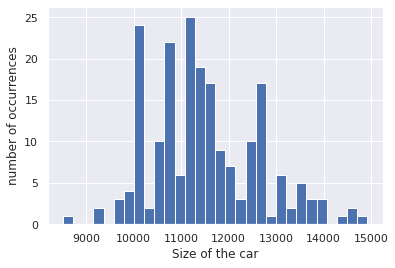

In [62]:
#exploring carsize
plt.hist(Full_df['carsize'].dropna(), bins=30)

plt.xlabel('Size of the car')
plt.ylabel('number of occurrences')
plt.show()

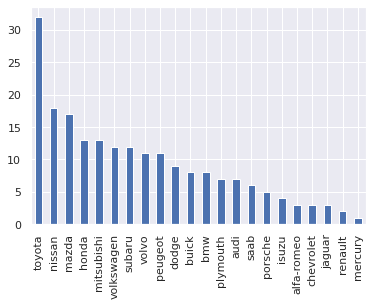

In [63]:
#exploring Carbrand

#plt.hist(Full_df['CarBrand'].dropna())

Full_df['CarBrand'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; y

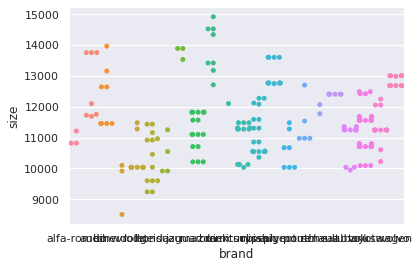

In [64]:
#exploring the 2 variables together

_ = sns.swarmplot(x='CarBrand', y='carsize', data=Full_df)
_ = plt.xlabel('brand')
_ = plt.ylabel('size')
plt.show()

**ECDF of 2 variables**

In [65]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

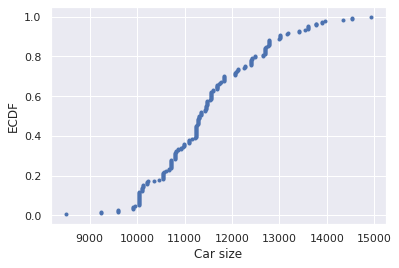

In [66]:
data=Full_df['carsize']
x,y= ecdf(data)

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Car size')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

Let's look for correlations

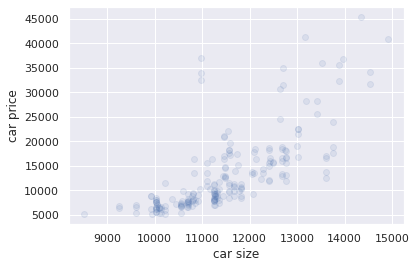

In [67]:
# Extract age and weight
carsize = Full_df['carsize']
price = Full_df['price']
 
# Add jittering to size
#carsize = Full_df['carsize'] + np.random.normal(0, 2.5, size=len(Full_df))
 
# Make a scatter plot
plt.plot(carsize, price, 'o', alpha=0.1)
 
plt.xlabel('car size')
plt.ylabel('car price')
 
plt.show()

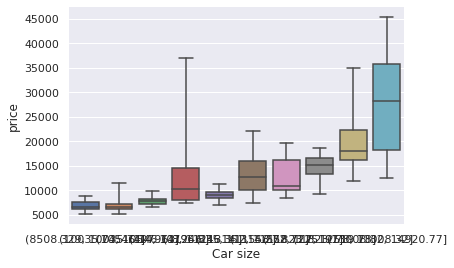

In [68]:
#box plot

import seaborn as sns

binned=pd.qcut(Full_df['carsize'], q=10)
Full_df['carsize_bin']= binned
# bucketizes values based on their distribution in a number of quantiles defined by q (her for eg, quartiles)

sns.boxplot(x=Full_df['carsize_bin'], y=Full_df['price'], data=data, whis=10)
 
# Plot the y-axis on a log scale
#plt.yscale('log')
 
# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Car size')
plt.ylabel('price')

plt.show()

# Correlation

In [69]:
# Select columns
#columns = [Full_df['carsize'], Full_df['price']]
#subset = Full_df[columns]
 
# Compute the correlation matrix
#print(subset.corr())

Full_df[Full_df.columns[1:]].corr()['price'][:]

symboling          -0.1
fueltype           -0.1
drivewheel          0.6
wheelbase           0.6
carlength           0.7
carwidth            0.8
carheight           0.1
curbweight          0.8
enginesize          0.9
boreratio           0.6
stroke              0.1
compressionratio    0.1
horsepower          0.8
peakrpm            -0.1
citympg            -0.7
highwaympg         -0.7
price               1.0
carsize             0.7
Name: price, dtype: float64

**Regression**

# Features pre-processing- part 2

**Numerical variables:** 
- Car ID - drop
- Symboling - drop
- Wheelbase: bucket
- Carlength, carwidth, carheight: maybe bundle into Carvolume? or just lenght and width
- curbweight: no idea
- enginesize  -GOOD
- boreratio: bucket
- stroke: maybe a partial duplicate of bore ratio?
- compression ratio- no idea
- horsepower
- peak RPM - good
- city, highway mpg - good, maybe average *them*


- All non-dropped: normalize


**Categorical variables**

- Carname - 1 hot
- Fueltype - code, drop
- Aspiration- code
- Carbody- 1-hot
- Doornumber- code
- Drivewheel - code
- Engine location- code
- Engine type- code
- Cylindernumber - code
- Carbrand - 1hot

## One-hot encoding of car brand

In [70]:
### Variables to encode: CarName, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem, CarBrand
### Let's start with CarBrand

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = Full_df['CarBrand']
values = array(data) # this is a numpy thing
#print(values)

# integer encode
label_encoder = LabelEncoder() # initialize it
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[, :])]) #maps each column to the encoded labels
#print(inverted)

#what if I want a vector with all the inverted labels?




In [71]:
#Inserting the Numpy array as vector values inside my df
import numpy as np
import pandas as pd
import scipy.sparse as sparse


#Full_df['CarBrand_enc'] = arr.toarray().tolist()

#Full_df.head()

##Maybe I can turn my array into a df and see from there:

brand_df = pd.DataFrame(onehot_encoded)
#brand_df.head()

##But i need the right column names
labels=Full_df['CarBrand'].unique()
#print(labels)

#print(brand_df.set_axis(labels, axis='columns'))
#Nice! seems to work, but I'm not 100% sure that the column names are right because the order migt have changed during ecoding

brand_df.set_axis(labels, axis='columns', inplace=True)
brand_df.head(10)





,alfa-romeo,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,buick,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fuzzy matching of of Car Name

In [72]:
pip install fuzzywuzzy


In [73]:
from fuzzywuzzy import fuzz

In [74]:
# Martin --> Fuzzy matching

#Levenstein distance: how many changes do I need to do before 2 strings become the same (so if 80, 80% the same)
#If they are more than 80% the same, they will stay in one group

combined_list = ['rakesh', 'zakesh', 'bikash', 'zikash', 'goldman LLC', 'oldman LLC']
combined_list.append('bakesh')
#print('input names:', combined_list)

grs = list() # groups of names with distance > 80
for name in combined_list:
    for g in grs:
        if all(fuzz.ratio(name, w) > 80 for w in g):  #w= words in the group
            g.append(name)
            break
    else:
        grs.append([name, ])

#print('output groups:', grs)
#outlist = [el for g in grs for el in g] ## element for group in groups for element in group
#print('output list:', outlist)


##pick the first element 
final_names=[]
for g in grs:
  final_names.append(g[0])
print(final_names)



['rakesh', 'bikash', 'goldman LLC']


In [75]:
Full_df['CarName'].unique()
#Full_df['CarName'].count()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [76]:
#Fuzzy matching to clean up carname


grs = list() # groups of names with distance > 80
for name in Full_df['CarName']:
    for g in grs:
        if all(fuzz.ratio(name, w) > 90 for w in g):  #w= words in the group
            g.append(name)
            break
    else:
        grs.append([name, ])

print('output groups:', grs)

#with w>90 it seems to work, but not perfectly




outlist = [el for g in grs for el in g] ## element for group in groups for element in group
print('output list:', outlist)


##pick the first element 
#final_names=[]
#for g in grs:
 # final_names.append(g[0])
#print(final_names)

output groups: [['alfa-romero giulia'], ['alfa-romero stelvio'], ['alfa-romero Quadrifoglio'], ['audi 100 ls', 'audi 100ls', 'audi 100ls'], ['audi fox'], ['audi 5000'], ['audi 4000'], ['audi 5000s (diesel)'], ['bmw 320i', 'bmw 320i'], ['bmw x1'], ['bmw x3', 'bmw x3'], ['bmw z4'], ['bmw x4'], ['bmw x5'], ['chevrolet impala'], ['chevrolet monte carlo'], ['chevrolet vega 2300'], ['dodge rampage'], ['dodge challenger se'], ['dodge d200'], ['dodge monaco (sw)'], ['dodge colt hardtop'], ['dodge colt (sw)'], ['dodge coronet custom'], ['dodge dart custom'], ['dodge coronet custom (sw)'], ['honda civic', 'honda civic', 'honda civic'], ['honda civic cvcc', 'honda civic cvcc'], ['honda accord cvcc'], ['honda accord lx'], ['honda civic 1500 gl'], ['honda accord', 'honda accord'], ['honda civic 1300'], ['honda prelude'], ['honda civic (auto)'], ['isuzu MU-X'], ['isuzu D-Max ', 'isuzu D-Max '], ['isuzu D-Max V-Cross'], ['jaguar xj'], ['jaguar xf'], ['jaguar xk'], ['maxda rx3'], ['maxda glc deluxe', 

In [77]:
#Let's create a feature now
Full_df['CarName1']=outlist
Full_df['CarName1'].unique()

  

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda glc deluxe',
       'mazda rx2 coupe', 'mazda rx-4', 'mazda 626', 'mazda glc',
       'mazda rx-7 gs', 'mazda glc 

## Finalize the new data

In [78]:
Full_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,carsize,carsize_bin,CarName1
0,1,3,alfa-romero giulia,1,std,two,convertible,2,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,13495.0,alfa-romeo,10820.1,"(10796.8, 11246.35]",alfa-romero giulia
1,2,3,alfa-romero stelvio,1,std,two,convertible,2,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,16500.0,alfa-romeo,10820.1,"(10796.8, 11246.35]",alfa-romero stelvio
2,3,1,alfa-romero Quadrifoglio,1,std,two,hatchback,2,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.7,3.5,9.0,154,5000,19,26,16500.0,alfa-romeo,11213.6,"(10796.8, 11246.35]",alfa-romero Quadrifoglio
3,4,2,audi 100 ls,1,std,four,sedan,1,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.2,3.4,10.0,102,5500,24,30,13950.0,audi,11690.9,"(11558.72, 11823.7]",audi 100 ls
4,5,2,audi 100ls,1,std,four,sedan,0,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.2,3.4,8.0,115,5500,18,22,17450.0,audi,11726.2,"(11558.72, 11823.7]",audi 100ls


In [79]:
##encode remaining features
Full_df['aspiration'] =Full_df['aspiration'].astype('category').cat.codes

Full_df['doornumber'] =Full_df['doornumber'].astype('category').cat.codes

Full_df['carbody'] =Full_df['carbody'].astype('category').cat.codes

Full_df['enginelocation'] =Full_df['enginelocation'].astype('category').cat.codes

Full_df['enginetype'] =Full_df['enginetype'].astype('category').cat.codes

Full_df['cylindernumber'] =Full_df['cylindernumber'].astype('category').cat.codes

Full_df['fuelsystem'] =Full_df['fuelsystem'].astype('category').cat.codes

Full_df['carbrand1'] =Full_df['CarBrand'].astype('category').cat.codes

Full_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,carsize,carsize_bin,CarName1,carbrand1
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.5,2.7,9.0,111,5000,21,27,13495.0,alfa-romeo,10820.1,"(10796.8, 11246.35]",alfa-romero giulia,0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.5,2.7,9.0,111,5000,21,27,16500.0,alfa-romeo,10820.1,"(10796.8, 11246.35]",alfa-romero stelvio,0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.7,3.5,9.0,154,5000,19,26,16500.0,alfa-romeo,11213.6,"(10796.8, 11246.35]",alfa-romero Quadrifoglio,0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.2,3.4,10.0,102,5500,24,30,13950.0,audi,11690.9,"(11558.72, 11823.7]",audi 100 ls,1
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.2,3.4,8.0,115,5500,18,22,17450.0,audi,11726.2,"(11558.72, 11823.7]",audi 100ls,1


In [80]:
Full_df[Full_df.columns[1:]].corr()['price'][:]

symboling          -0.1
fueltype           -0.1
aspiration          0.2
doornumber         -0.0
carbody            -0.1
drivewheel          0.6
enginelocation      0.3
wheelbase           0.6
carlength           0.7
carwidth            0.8
carheight           0.1
curbweight          0.8
enginetype          0.0
cylindernumber     -0.0
enginesize          0.9
fuelsystem          0.5
boreratio           0.6
stroke              0.1
compressionratio    0.1
horsepower          0.8
peakrpm            -0.1
citympg            -0.7
highwaympg         -0.7
price               1.0
carsize             0.7
carbrand1          -0.3
Name: price, dtype: float64

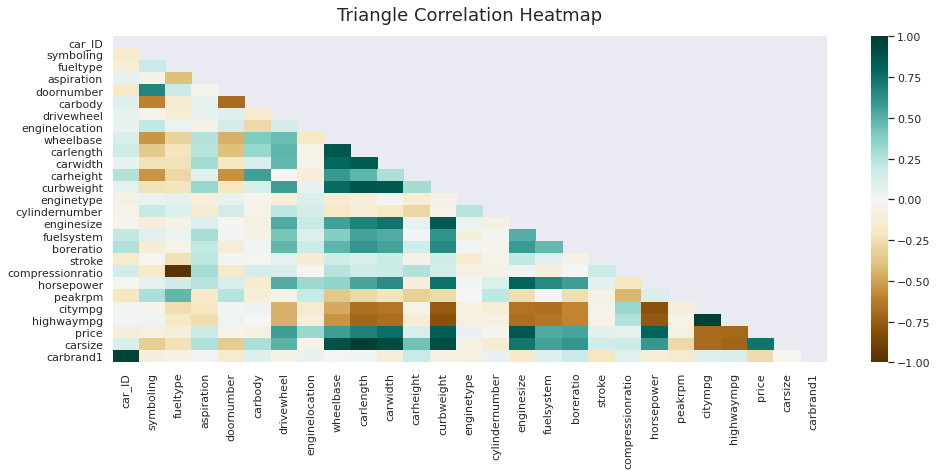

In [81]:
import seaborn as sns

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(Full_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(Full_df.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [113]:
#New data frame with only relevant features
newDF=pd.DataFrame()

#newDF['carwidth']=Full_df['carwidth'] 
#newDF['curbweight']=Full_df['curbweight']
newDF['enginesize']=Full_df['enginesize']
newDF['horsepower']=Full_df['horsepower']

#newDF['mpg']=Full_df['citympg']*Full_df['highwaympg']/2 #this average actually ends up having a lower correlation, so I'll just use highway MPG
#newDF['mpg']=Full_df['highwaympg']

#newDF['price']=Full_df['price']


newDF.head()


#Feature normalization with z scores

newDF_mean = newDF.mean()
newDF_std = newDF.std()
newDF_norm = (newDF - newDF_mean)/newDF_std


newDF_norm.head()

#I'm leaving price in the old df, but I need to normalize it anyways
price_mean= Full_df['price'].mean()
price_std= Full_df['price'].std()


Full_df['Price1']=((Full_df['price']-price_mean)/price_std)
Full_df.head()

Full_df.describe()
newDF_norm.describe()

#newDF_norm[newDF_norm.columns[1:]].corr()['price'][:]

print(newDF.head())
print(newDF_norm.describe())

   enginesize  horsepower
0         130         111
1         130         111
2         152         154
3         109         102
4         136         115
       enginesize  horsepower
count       205.0       205.0
mean          0.0         0.0
std           1.0         1.0
min          -1.6        -1.4
25%          -0.7        -0.9
50%          -0.2        -0.2
75%           0.3         0.3
max           4.8         4.7


# PCA- principal component analysis

 when you have very weak features

# SMV classifier

In [83]:
# Martin -> SVM classifier  (from https://scikit-learn.org/stable/supervised_learning.html )

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Load dataset
cancer = datasets.load_breast_cancer()


#print("Features: ", cancer.feature_names)
#print("Labels: ", cancer.target_names)
#print(cancer.data.shape) # shape of my matrix
#print(cancer.data[0:2])  #
#print(cancer.target)     # print the cancer labels (0:malignant, 1:benign)


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
     cancer.data, cancer.target, test_size=0.3,random_state=109) #30% of dataset is test, random state is like a seed

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel SVC- support vector machine that we use as a classifier - linear: it's a linear classification, I could use other functions, eg. ploynomial, gaussian, etc.

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

###Confusion matrix

#import matplotlib.pyplot as plt
#data = {'y_test':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
#        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
#        }
#df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
#sns.heatmap(confusion_matrix, annot=True)
#plt.show()

Accuracy: 0.9649122807017544


# SVM regression

[-0.82132509 -0.59262087 -0.27849159 -0.29064666  0.0711896   0.22133864
 -0.12118887 -0.89360257 -0.86326292 -0.71601257  0.03894038  0.88652255
 -0.04755502  0.63075652 -0.42943001  1.36704561 -0.23571876 -0.90710041
  0.02643968  0.40172892 -0.09483812  0.14590943 -0.87716369  0.58091047
 -0.81923399 -0.91828789 -0.56499247  1.14905289  2.52707953 -0.17434722
 -0.93337646  0.63654523 -0.31161738  2.61659811  1.27400082 -0.56442842
 -0.23793415  0.77834484  0.04836714  0.48030665  0.60678199  0.60223914
  2.16956595 -0.85086004 -0.92242573  0.52257365  0.56866608 -0.93627909
 -0.7281045   0.61193277 -0.91771399 -0.27849159  0.90442252 -0.56499247
 -0.459675    0.85861417 -0.31587683 -0.19515669 -0.81974975 -0.09402668
  1.2631652  -0.6476155 ]
97    -0.7
23    -0.7
28    -0.5
100   -0.5
135    0.3
      ... 
87    -0.5
36    -0.7
131   -0.4
68     1.9
140   -0.7
Name: Price1, Length: 62, dtype: float64
RMSE:  0.4253871544886527


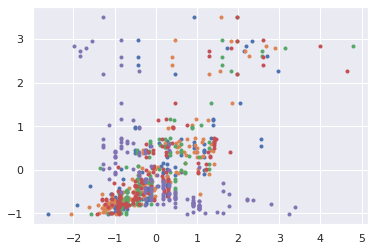

In [111]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

# Split dataset into training set and test set

x=newDF_norm
y=Full_df['Price1']

x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.3,random_state=109) #30% of dataset is test, random state is like a seed. It draws the data randomly
#Xs and ys are always coupled 

#training the model
SupportVectorRegModel= SVR(kernel='linear', C=100, gamma='auto') #Kernel can be linear, poly, sigmoid, rbf is default
SupportVectorRegModel.fit(x_train, y_train)


#predict
y_pred=SupportVectorRegModel.predict(x_test)
y_pred

print(y_pred)

print(y_test)





#Evaluate the model
mse=mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
print('RMSE: ', rmse)



plt.plot(x_train, y_train, marker='.', linestyle='none')
plt.show()







# Linear Regression with Keras##

In [85]:
### splitting training and testing data again from the original DF (with both x and y)
newDF_norm['price']=Full_df['Price1'] #adding ys back into the original df
newDF_norm.head()


,carwidth,curbweight,enginesize,horsepower,mpg,price
0,-0.8,-0.0,0.1,0.2,-0.5,0.0
1,-0.8,-0.0,0.1,0.2,-0.5,0.4
2,-0.2,0.5,0.6,1.3,-0.7,0.4
3,0.1,-0.4,-0.4,-0.1,-0.1,0.1
4,0.2,0.5,0.2,0.3,-1.3,0.5


In [86]:
# Renaming price as target?
newDF_norm['target'] = newDF_norm['price']

# Drop un-used columns.
newDF_norm = newDF_norm.drop(columns=['price'])

In [87]:
train, test = train_test_split(newDF_norm, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

131 train examples
33 validation examples
41 test examples


In [88]:
##Creating an input pipline to carry data from the df to tf keras

# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(newDF_norm, shuffle=True, batch_size=32):
  newDF_norm = newDF_norm.copy()
  labels = newDF_norm.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(newDF_norm), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(newDF_norm))
  ds = ds.batch(batch_size)
  return ds


batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)


for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of hp:', feature_batch['horsepower'])
  print('A batch of targets:', label_batch )

Every feature: ['carwidth', 'curbweight', 'enginesize', 'horsepower', 'mpg']
A batch of hp: tf.Tensor([ 0.30049759  0.04761579 -0.23055419 -1.31794592  0.42693849], shape=(5,), dtype=float64)
A batch of targets: tf.Tensor([ 0.54980231  1.15076472 -0.0096022  -0.66113509  1.41300514], shape=(5,), dtype=float64)


In [89]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import feature_column

feature_columns=[]

for header in ['carwidth', 'curbweight', 'enginesize', 'horsepower', 'mpg']:
  feature_columns.append(feature_column.numeric_column(header))



#feature_columns.append(newDF_norm['carwidth']) 
#feature_columns.append(newDF_norm['curbweight'])
#feature_columns.append(newDF_norm['enginesize'])
#feature_columns.append(newDF_norm['horsepower'])
#feature_columns.append(newDF_norm['mpg'])

# Convert the list of feature columns into a layer that will later be fed into
# the model. 

my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [90]:
# Define the plotting function.

def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [91]:
# Define functions to create and train a linear regression model
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  
  #features = {name:np.array(value) for name, value in dataset.items()}
  features=feature_columns
  label = labels


  #label = np.array(features.pop(label_name))

  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]

  return epochs, rmse   

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [92]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 15
batch_size = 10
label_name = "price"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train, epochs, batch_size, label_name)
plot_the_loss_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in test.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

ValueError: ignored

In [ ]:
# Martin --> Regression with SVMs

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
# Martin -> PCA
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# The explained variance tells you how much information (variance) can be attributed to each of the principal components. 
# This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) 
# when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% 
# of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the 
# information.

pca.explained_variance_ratio_

